# **The Foundation of Applied Machine Learning**
## Spring 2019

### Instructor: [**Prof. Bahram Mobasher**](http://faculty.ucr.edu/~mobasher/)
### Teaching Assistance: [**Abtin Shahidi**](https://abtinshahidi.github.io/) email *abtin.shahidi--at--email.ucr.edu*

### Course webpage: [https://abtinshahidi.github.io/teaching/2019-spring-foundation-machine-learning](https://abtinshahidi.github.io/teaching/2019-spring-foundation-machine-learning)



# **Week 2**

## Introduction to statistics:

> "I couldn't claim that I was smarter than sixty-five other guys--but the average of sixty-five other guys, certainly!" 
>
> -- <cite>*Richard P. Feynman*, Surely You're Joking, Mr. Feynman!</cite>


> "There are three kinds of lies: lies, damned lies, and statistics." 
>
> -- <cite>*Mark Twain*, 1924</cite>
 


**Statistic** is a vast subject of study, covering from data collection (designing surveys), organizing and preparing data, and making interpretation and analysis on the data and at the end presenting and visualizing the crux of the investigation in a meaningful way.

In this course, we are going to discuss how can we clean up a given dataset, then analyze and visualize critical information in it.

<hr></hr>

First let's start with a quick exercise:

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# font parameters dictionary
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 25,}


# figure parameters dictionary
figure = {"figsize" : (6,6),
          "dpi" : 120,
          "facecolor" : "w", 
          "edgecolor" : "k",}



# use LaTeX fonts in the plot
plt.rc('text', usetex=True)

# Set the font parameters
plt.rc('font', **font) 

First, we need a gaussian function. We can use built-in functions in numpy for getting a gaussian function. However, let's define it ourself  as a practice:


In [62]:
def Gaussian_prob(x, _mu=0, _sigma=1):
    """Gaussian distribution: probability of getting x given mu=_mu, sigma=_sigma"""
    return (1/np.sqrt(2*np.pi*_sigma**2))*np.exp(-(x-_mu)**2/(2*_sigma**2))

In [63]:
# initial configuration

x_span = np.linspace(0,20, 1000)
mu, sigma = 10, 5

prob_list = [Gaussian_prob(x, mu, sigma) for x in x_span]

Another equivalent way of doing the above but using the numpy arrays. (Be very careful when writing code this way, since the code above works for any iterable object; but, the method used below can only be applied for the **numpy array object** and **not a list**. 

In [64]:
prob_np_array = Gaussian_prob(x_span, mu, sigma)

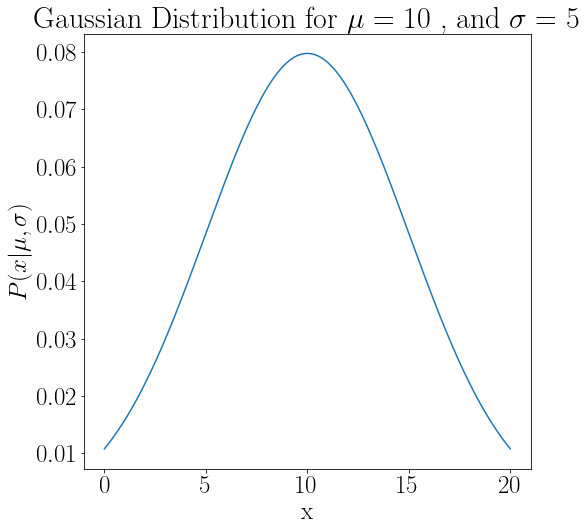

In [65]:
plt.figure(figsize=(8,8))
plt.plot(x_span, prob_list)

plt.title("Gaussian Distribution for $\mu=$ {} , and $\sigma=$ {}".format(mu, sigma))
plt.xlabel(r"x")
plt.ylabel(r"$P(x|\mu, \sigma)$")

plt.show()

## **Perfect!!**

Now that we have our Gaussian function, let's start doing some estimation!

<hr>

## **Particle X** 
### What is the **True** mass of the newly discovered X particle?

<hr>

Imagine that you are a Primary investigator for one particular experiment done at the [**CERN**](https://home.cern/) (The world's most powerful particle accelerator). There was a new experiment that led to the discovery of particle X. But, there has been a lot of debate about the actual mass of the particle. So, you asked **ATLAS** and **CMS** team to measure the mass of the particle entirely separate from each other. (These are two different detectors at CERN) They gave you the following results for the mass and the corresponding error. (in  an unknown unit!!!)


$$
\begin{gather}
M_{ATLAS} = 10.12 \pm 3.7 \\
M_{CMS} = 7.42 \pm 1.6
\end{gather}
$$

In [66]:
mass_atlas, mass_err_atlas = 10.12, 3.7
mass_cms, mass_err_cms = 7.42, 1.6

You have to hold a news conference to announce the discovery as well as the measured mass. So, how can you find the value for the actual mass of the particle? In other words, how can you find this value, using **all** the information about these two measurements?

The easiest way that comes to mind is to report the average of these values as the best representation of the **True** value of the mass:

In [67]:
mass_average = (mass_atlas + mass_cms)/2
print(mass_average)

8.77


#### <span style="color:red">_But there is huge problem with this analysis!!!_</span>

The lead investigator of the CMS team calls you and asks for an explanation for your decision to report the average. Since he argues that the measurement done by the ATLAS team is not as valid as the CMS team since the ATLAS team has much higher uncertainty in their experiment. But in your analysis, you are giving both these measurements the same weight by averaging them. **How can you take into account the difference in uncertainty in your report?**

$ X_1 $: mass_atlas, mass_err_atlas  
$ X_2 $: mass_atlas, mass_err_atlas  

Basically, what is the $p(m_X|X_1, X_2)$ (probability distribution of the mass of X given two sets of measurements ($X_1, X_2$))?

> “Probability is orderly opinion and inference from data is nothing other than the revision of such opinion in the light of relevant new information.” 
>
> -- <cite>*Eliezer S. Yudkowsky*</cite> 

### **Thomas Bayes**' theorem to the rescue!!  (Thanks to Laplace's later rediscovey)
Luckily we can approach this problem in a Bayesian framework, which lets us update our belief (knowledge/information) in a consistent way when we get new information. The Bayesian outlook is far is far broader than a restriction imposed by a frequentist outlook. For example, when someone tries to measure the lenght of the table, assumes the lenght to be have some true value and she only can measure the lenght with some noise that should be modeled later. However, in a Bayesian approach she will look at the lenght of the table as an intrinsically a random variable with a particular distribution and the process of measurement is only and updated version of the prior belief in the lenght of the table. The frequentist is restricted to the domain in which several number of experiment can be done and the true value of a measure will emerge after several rounds of experiments. For example, the fairness of the coin can be measured by having n experiment and counting the number of heads to n when n goes to infinity. But what about our degree of belief about the Big Bang as the main cosmological scenario of the emeregence of the universe? We don't have enough experiment to talk about a frequency of such phenomena so the frequentist have to suspend jugdement about the chances of the validity of this theory; in oppose to the Bayesian who can not only talk about such degree of belief but rather update it in light of a new data. 

According to Bayes:
$p(m_X|X_1, X_2) \varpropto p(X_1, X_2|m_X)$ 
or more precisely:
$$
\begin{equation}
p(X|Y) = \frac{P(Y|X)P(X)}{P(Y)}
\end{equation}
$$
Now things are much easier to handle since we can assume some models for $ p(X_1, X_2|m_X)$. (We don't need to take care about the normalization here, we are going to get there next week)

### **First let's make some assumptions:**
#### **1. Bayesian statistics works!**
#### **2. The measurements are independent. $ p(X_1, X_2|m_X) = p(X_1|m_X)*p(X_1|m_X)$**
#### **3. Measurements follow a random Gaussian distribution. $PDF(m_{measured})=Gaussian(m_{measured}, \sigma_{measured})$**
#### **4. We have no other information about $m_X$, so we can assume the simplest form which is uniform (tophat) probability distribution (prior) for this quantity. (quantity that we are looking for)**



**Let's calculate the $p(X_1|m_X)$ for different values of $m_X$:**

Start by sampling potential values for m_X:

In [68]:
m_X_span = np.arange(0, 25, 0.001)

Making two arrays of zeros for storing the probabilities

In [69]:
prob_atlas = np.zeros(len(m_X_span))
prob_cms = np.zeros(len(m_X_span))

Building the joint pdf [p(X1, X2)]

In [70]:
for i, m in enumerate(m_X_span):
    prob_atlas[i] = Gaussian_prob(mass_atlas, _mu=m, _sigma=mass_err_atlas)
    prob_cms[i] = Gaussian_prob(mass_cms, _mu=m, _sigma=mass_err_cms)

Finding the joint distribution

In [71]:
joint_prob = prob_atlas * prob_cms

Since we use the Uniform  prior for $m_X$, it is very easy to find the normalization; we can sum over all the elements of the probability vector:

In [72]:
Normalization = len(m_X_span)/(sum(joint_prob)*(max(m_X_span)-min(m_X_span)))
joint_prob_normalized = joint_prob * Normalization

Finding the mass corresponding to the highest probability. (So this is the most probable value)

In [73]:
m_X_max_prob = m_X_span[joint_prob==max(joint_prob)]

Plotting the pdf for the two measurements + joint pdf normalized and unnormalized:
                                                                                    

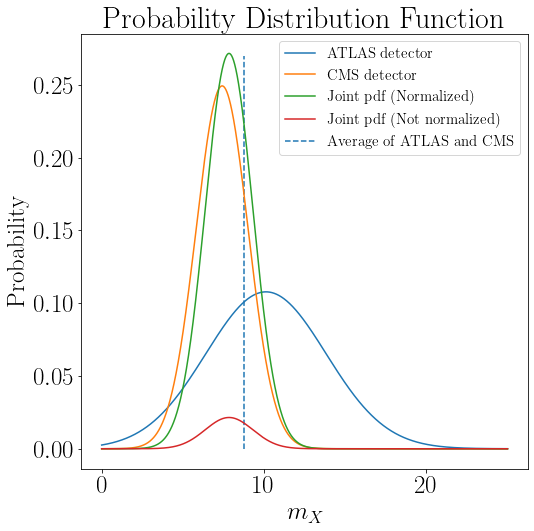

In [74]:
plt.figure(figsize=(8,8))

plt.plot(m_X_span, prob_atlas, label="ATLAS detector")
plt.plot(m_X_span, prob_cms, label="CMS detector")

plt.plot(m_X_span, joint_prob_normalized, label="Joint pdf (Normalized)")
plt.plot(m_X_span, joint_prob, label="Joint pdf (Not normalized)")
plt.vlines(mass_average, 0, 0.27, linestyles="dashed", label="Average of ATLAS and CMS")

plt.title(r"Probability Distribution Function")
plt.xlabel(r"$m_X$")
plt.ylabel(r"Probability")

plt.legend(fontsize=15)
plt.show()

**As you can see in the plot the joint pdf is much closer to the CMS team results rather than ATLAS team measurement; which was expected from their uncertainties. This is the value of mass you can report:**

In [75]:
print(m_X_max_prob)

[7.845]


There is an analytical way of getting to the same results, since we are working with gaussian functions which have very special properties. One that we need is the following:


**$Gaussian(\mu_1,\sigma_1)*Gaussian(\mu_2,\sigma_2)=Gaussian(\frac{\mu_1\sigma_2^2+\mu_2\sigma_1^2}{\sigma_1^2+\sigma_2^2},\frac{\sigma_1\sigma_2}{\sqrt{\sigma_1^2+\sigma_2^2}})$**

In [76]:
def two_gaussian(mu1, mu2, sigma1, sigma2):
    new_mu = (mu1 * sigma2**2 + mu2 * sigma1**2)/(sigma1**2 + sigma2**2)
    new_sigma = (sigma2 * sigma1)/np.sqrt(sigma1**2 + sigma2**2) 
    return new_mu, new_sigma 

In [77]:
two_gaussian(mass_cms, mass_atlas, mass_err_cms, mass_err_atlas)

(7.845353846153847, 1.4685712575362284)

### **Which as you can see agrees with our result from the approximation.**

# Fitting any model with Least Squared:
Here let's look at the function with few parameters:


$$
y = f(x) = \alpha x e^{\gamma x}
$$

In [78]:
from math import exp

def f(x, α, γ):
    return α * x * exp(γ * x)

Here we will produce some data by adding some errors to the model predictions:

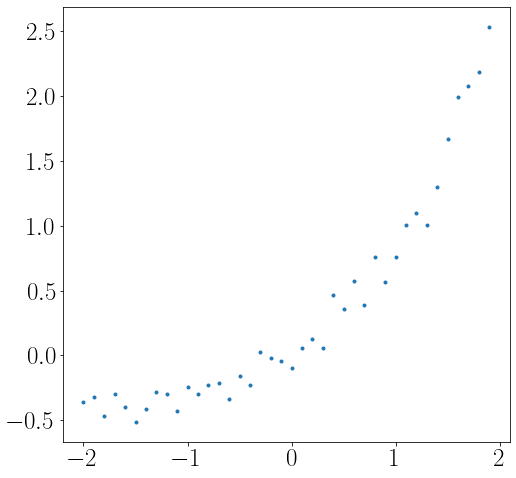

In [79]:
np.random.seed(4)

α, γ = 0.5, 0.5

x_span = [i/100 for i in range(-200, 200, 10)]
y_span = [f(i, α, γ) + 0.1 * np.random.randn() for i in x_span]

plt.figure(figsize=(8, 8))

plt.plot(x_span, y_span, ".")

plt.show()

In [22]:
def least_squared(y_measured, y_prediction):
    ls = []
    for y0, y1 in zip(y_measured, y_prediction):
        ls.append((y0 - y1)**2)
    return sum(ls)**0.5

In [23]:
def prob(l):
    return exp(-l**2)

This is the prior for the $\alpha$, and $\gamma$, which we will choose to be uniform.

In [24]:
α_span = np.linspace(0.2, 0.8, 300)
γ_span = np.linspace(0.2, 0.9, 300)

Going through the parameters sampling to find the pair that makes the least squared function minimum. (equavalently makes the `prob` function maximum. 

In [80]:
values = []
for α in α_span:
    for γ in γ_span:
        y_prediction = [f(x, α, γ) for x in x_span]
        y_measured = y_span
        values.append((prob(least_squared(y_measured, y_prediction)), α, γ))

finding the pairs sorted with respect to their probabilities:

In [81]:
sorted(values, key=lambda x : x[0], reverse=True)[:5]

[(0.6601053140901147, 0.5090301003344482, 0.49966555183946487),
 (0.6600499054466553, 0.5070234113712375, 0.5020066889632107),
 (0.6600216832077364, 0.5110367892976588, 0.49732441471571903),
 (0.6599868649784066, 0.5090301003344482, 0.49732441471571903),
 (0.6599684206411858, 0.5070234113712375, 0.49966555183946487)]

In [82]:
A, B = sorted(values, key=lambda x : x[0], reverse=True)[0][1], sorted(values, key=lambda x : x[0], reverse=True)[0][2]

## Plotting the probability density: $p(\alpha, \gamma | data)$

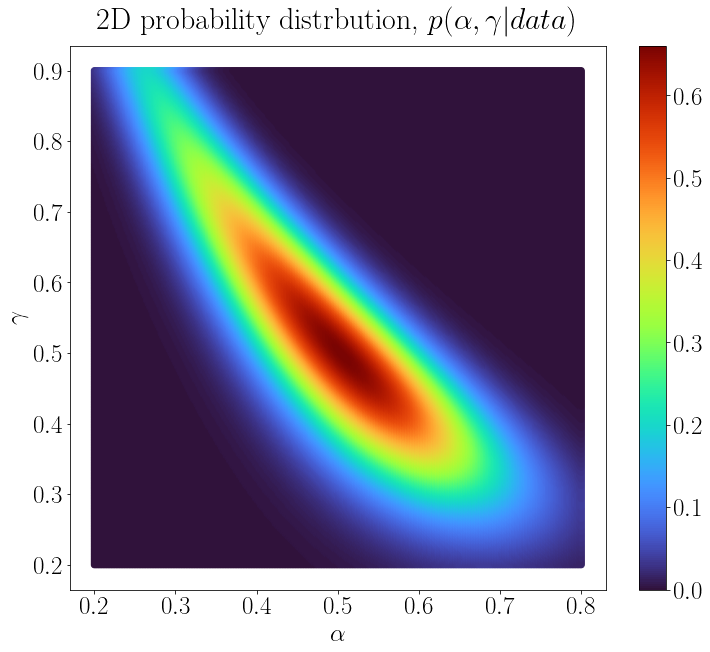

In [83]:
X = [value[1] for value in values]
Y = [value[2] for value in values]
Z = [value[0] for value in values]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title(r"2D probability distrbution, $p(\alpha, \gamma | data)$", y = 1.02)
c = ax.scatter(X, Y, c=Z, cmap="turbo")

ax.set_xlabel(r"$\alpha$", fontsize=25)
ax.set_ylabel(r"$\gamma$", fontsize=25)

plt.colorbar(c)
plt.show()

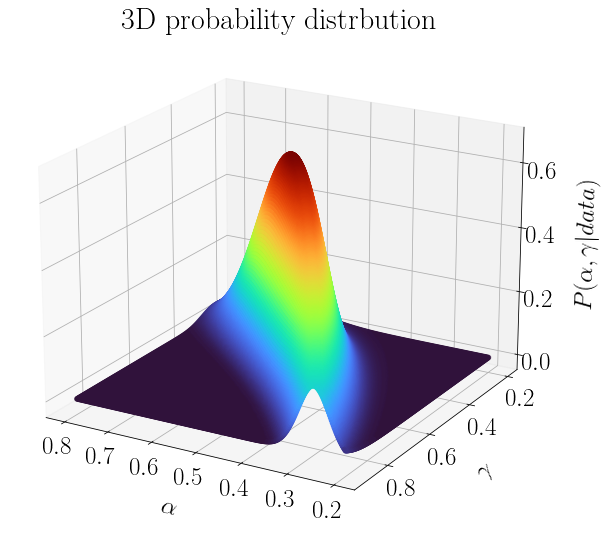

In [85]:
from mpl_toolkits import mplot3d

plt.figure(figsize=(10, 10))

ax = plt.axes(projection='3d',)
ax.view_init(azim=120, elev=20)

ax.scatter3D(X, Y, Z, c=Z, cmap='turbo')

ax.set_title(r"3D probability distrbution", y=1.03)

ax.set_xlabel(r"$\alpha$", fontsize=25, labelpad=20)
ax.set_ylabel(r"$\gamma$", fontsize=25, labelpad=20)
ax.set_zlabel(r"$P(\alpha, \gamma | data)$", fontsize=25, labelpad=20)

plt.show()

In [88]:
A, B

(0.5090301003344482, 0.49966555183946487)

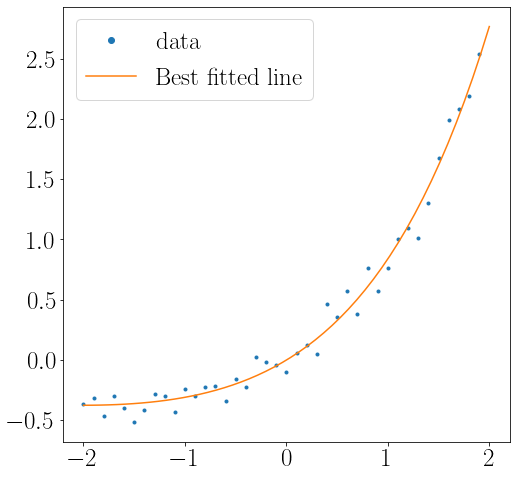

In [86]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_span, y_span, ".", label="data")

x_span1 = np.linspace(-2, 2, 50)
ax.plot(x_span1, [f(x, A, B) for x in x_span1], label="Best fitted line")

ax.legend(markerscale=2)
plt.show()

# 